In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [22]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return self.step(z)

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        self.weight_history = []
        self.loss_history = []
        self.acc_history = []

        for epoch in range(self.epochs):
            total_error = 0
            print(f"\nEpoch {epoch+1}")

            for i in range(len(X)):
                z = np.dot(X[i], self.w) + self.b
                y_pred = self.step(z)

                error = y[i] - y_pred
                total_error += abs(error)

                self.w += self.lr * error * X[i]
                self.b += self.lr * error

                print(f"Sample {i+1} | w={self.w} | b={self.b}")

            self.loss_history.append(total_error)

            # Accuracy per epoch
            y_epoch_pred = self.predict(X)
            acc = np.mean(y_epoch_pred == y)
            self.acc_history.append(acc)

            print(f"Loss={total_error}, Accuracy={acc*100:.2f}%")

            if total_error == 0:
                print("✅ Converged!")
                break


In [23]:
def plot_decision_boundary(X, y, w, b, title):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=100)

    x_vals = np.array([0, 1])
    y_vals = -(w[0]*x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--')

    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


In [24]:
def plot_loss(loss, title):
    plt.figure(figsize=(5,3))
    plt.plot(loss, marker='o')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Total Misclassifications")
    plt.show()


In [25]:
def plot_accuracy(acc, title):
    plt.figure(figsize=(5,3))
    plt.plot(acc, marker='o')
    plt.ylim(0, 1.05)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.show()


In [26]:
X_nand = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_nand = np.array([1,1,1,0])



Epoch 1
Sample 1 | w=[0. 0.] | b=0.0
Sample 2 | w=[0. 0.] | b=0.0
Sample 3 | w=[0. 0.] | b=0.0
Sample 4 | w=[-0.1 -0.1] | b=-0.1
Loss=1, Accuracy=25.00%

Epoch 2
Sample 1 | w=[-0.1 -0.1] | b=0.0
Sample 2 | w=[-0.1  0. ] | b=0.1
Sample 3 | w=[-0.1  0. ] | b=0.1
Sample 4 | w=[-0.2 -0.1] | b=0.0
Loss=3, Accuracy=50.00%

Epoch 3
Sample 1 | w=[-0.2 -0.1] | b=0.0
Sample 2 | w=[-0.2  0. ] | b=0.1
Sample 3 | w=[-0.1  0. ] | b=0.2
Sample 4 | w=[-0.2 -0.1] | b=0.1
Loss=3, Accuracy=75.00%

Epoch 4
Sample 1 | w=[-0.2 -0.1] | b=0.1
Sample 2 | w=[-0.2 -0.1] | b=0.1
Sample 3 | w=[-0.1 -0.1] | b=0.2
Sample 4 | w=[-0.2 -0.2] | b=0.1
Loss=2, Accuracy=50.00%

Epoch 5
Sample 1 | w=[-0.2 -0.2] | b=0.1
Sample 2 | w=[-0.2 -0.1] | b=0.2
Sample 3 | w=[-0.2 -0.1] | b=0.2
Sample 4 | w=[-0.2 -0.1] | b=0.2
Loss=1, Accuracy=100.00%

Epoch 6
Sample 1 | w=[-0.2 -0.1] | b=0.2
Sample 2 | w=[-0.2 -0.1] | b=0.2
Sample 3 | w=[-0.2 -0.1] | b=0.2
Sample 4 | w=[-0.2 -0.1] | b=0.2
Loss=0, Accuracy=100.00%
✅ Converged!


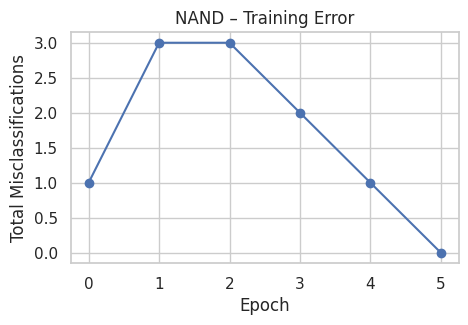

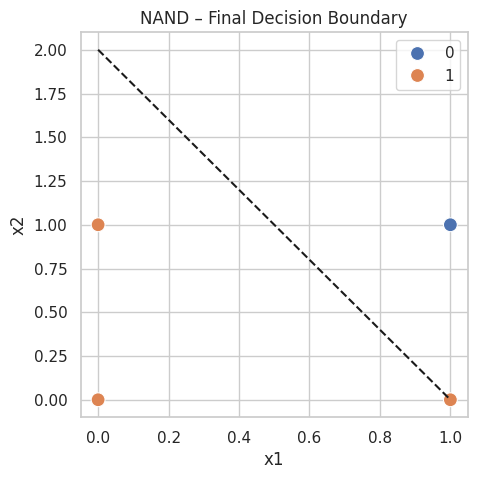

In [27]:
p_nand = Perceptron(lr=0.1, epochs=10)
p_nand.fit(X_nand, y_nand)

plot_loss(p_nand.loss_history, "NAND – Training Error")
plot_decision_boundary(X_nand, y_nand, p_nand.w, p_nand.b, "NAND – Final Decision Boundary")


Final NAND Accuracy: 1.0


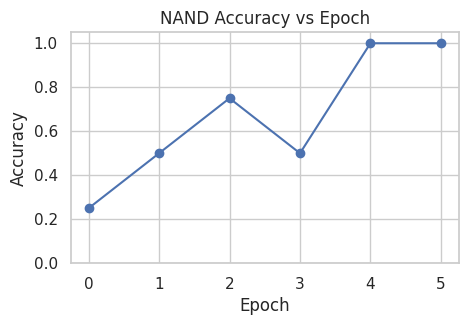

In [28]:
y_pred_nand = p_nand.predict(X_nand)
nand_acc = np.mean(y_pred_nand == y_nand)

print("Final NAND Accuracy:", nand_acc)

plot_accuracy(p_nand.acc_history, "NAND Accuracy vs Epoch")


In [29]:
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([0,1,1,0])



Epoch 1
Sample 1 | w=[0. 0.] | b=-0.1
Sample 2 | w=[0.  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.0
Sample 4 | w=[-0.1  0. ] | b=-0.1
Loss=3, Accuracy=50.00%

Epoch 2
Sample 1 | w=[-0.1  0. ] | b=-0.1
Sample 2 | w=[-0.1  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.1
Sample 4 | w=[-0.1  0. ] | b=0.0
Loss=3, Accuracy=50.00%

Epoch 3
Sample 1 | w=[-0.1  0. ] | b=-0.1
Sample 2 | w=[-0.1  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.1
Sample 4 | w=[-0.1  0. ] | b=0.0
Loss=4, Accuracy=50.00%

Epoch 4
Sample 1 | w=[-0.1  0. ] | b=-0.1
Sample 2 | w=[-0.1  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.1
Sample 4 | w=[-0.1  0. ] | b=0.0
Loss=4, Accuracy=50.00%

Epoch 5
Sample 1 | w=[-0.1  0. ] | b=-0.1
Sample 2 | w=[-0.1  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.1
Sample 4 | w=[-0.1  0. ] | b=0.0
Loss=4, Accuracy=50.00%

Epoch 6
Sample 1 | w=[-0.1  0. ] | b=-0.1
Sample 2 | w=[-0.1  0.1] | b=0.0
Sample 3 | w=[0.  0.1] | b=0.1
Sample 4 | w=[-0.1  0. ] | b=0.0
Loss=4, Accuracy=50.00%

Epoch 7
Sample 1 | w

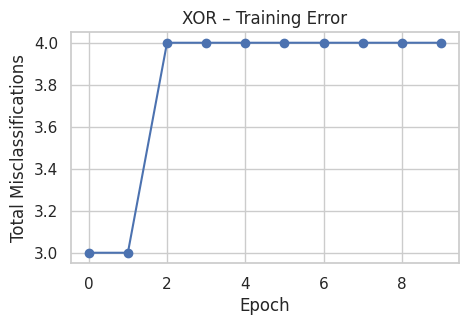

/tmp/ipython-input-3406912772.py:6: RuntimeWarning: divide by zero encountered in divide
  y_vals = -(w[0]*x_vals + b) / w[1]
/tmp/ipython-input-3406912772.py:6: RuntimeWarning: invalid value encountered in divide
  y_vals = -(w[0]*x_vals + b) / w[1]


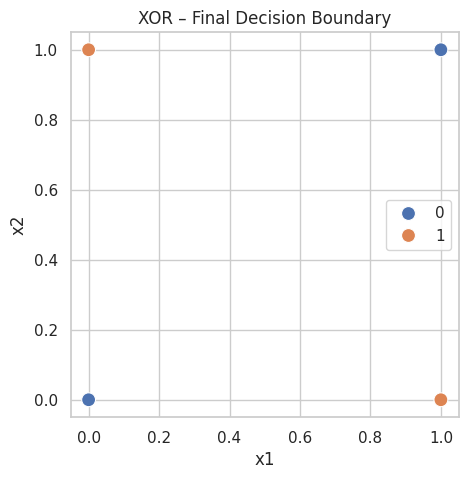

In [30]:
p_xor = Perceptron(lr=0.1, epochs=10)
p_xor.fit(X_xor, y_xor)

plot_loss(p_xor.loss_history, "XOR – Training Error")
plot_decision_boundary(X_xor, y_xor, p_xor.w, p_xor.b, "XOR – Final Decision Boundary")


Final XOR Accuracy: 0.5


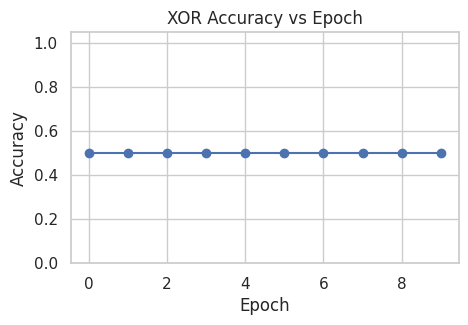

In [31]:
y_pred_xor = p_xor.predict(X_xor)
xor_acc = np.mean(y_pred_xor == y_xor)

print("Final XOR Accuracy:", xor_acc)

plot_accuracy(p_xor.acc_history, "XOR Accuracy vs Epoch")
